In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## PowerScheduling

$$
n(t) = \frac{\eta_0}{
    (1 + \frac{t}{s})^{c}
    }
$$
> $t$ e o numero da iteração

In [211]:
def etaPower(eta_0 , iter=10, c=1, s=1):
    listEta = []
    for t in range(iter):
        listEta.append(eta_0 / ((1+(t/s))**c))
    return listEta

In [212]:
pd.concat(
    [pd.DataFrame( dict( etai_c2 = etaPower(1e-3,c=2), iter = range(10) )),
    pd.DataFrame( dict( etai_c2_s10 = etaPower(1e-3,c=2,s=10), iter = range(10) ))]
    ,axis=1
)

,etai_c2,iter,etai_c2_s10,iter
0,0.001000,0,0.001000,0
1,0.000250,1,0.000826,1
2,0.000111,2,0.000694,2
3,0.000063,3,0.000592,3
4,0.000040,4,0.000510,4
5,0.000028,5,0.000444,5
6,0.000020,6,0.000391,6
7,0.000016,7,0.000346,7
8,0.000012,8,0.000309,8
9,0.000010,9,0.000277,9


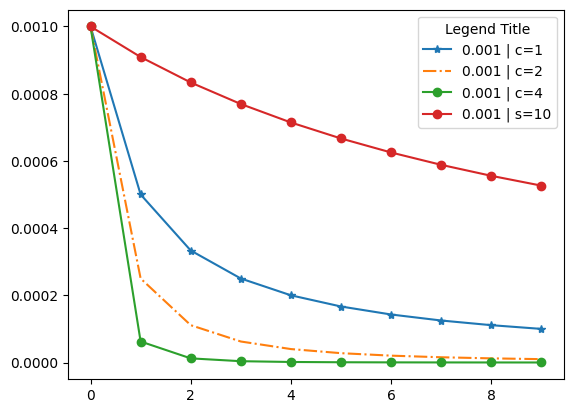

In [213]:
plt.plot(range(10),etaPower(1e-3,c=1,s=1),'-*',label='0.001 | c=1')
plt.plot(range(10),etaPower(1e-3,c=2),'-.',label='0.001 | c=2')
plt.plot(range(10),etaPower(1e-3,c=4),'-o',label='0.001 | c=4')
plt.plot(range(10),etaPower(1e-3,s=10),'-o',label='0.001 | s=10')

plt.legend(title = "Legend Title") 
plt.show()

&nbsp;

## Exponencial Scheduling

In [214]:
def etaExpo(eta_0, iter=10, s=1):
    listEta = []
    for t in range(iter):
        listEta.append(eta_0*((0.1)**(t/s)))
    return listEta

In [215]:
pd.concat(
    [pd.DataFrame( dict( etai_c2 = etaExpo(1e-1,s=1), iter = range(10) )),
    pd.DataFrame( dict( etai_c2_s10 = etaExpo(1e-1,s=10), iter = range(10) ))]
    ,axis=1
)

,etai_c2,iter,etai_c2_s10,iter
0,1.000000e-01,0,0.100000,0
1,1.000000e-02,1,0.079433,1
2,1.000000e-03,2,0.063096,2
3,1.000000e-04,3,0.050119,3
4,1.000000e-05,4,0.039811,4
5,1.000000e-06,5,0.031623,5
6,1.000000e-07,6,0.025119,6
7,1.000000e-08,7,0.019953,7
8,1.000000e-09,8,0.015849,8
9,1.000000e-10,9,0.012589,9


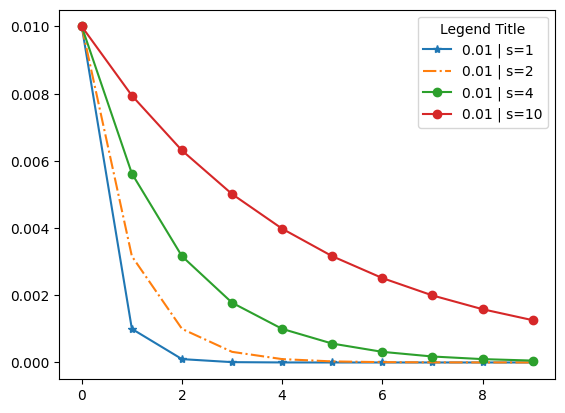

In [216]:
plt.plot(range(10),etaExpo(1e-2,s=1),'-*',label='0.01 | s=1')
plt.plot(range(10),etaExpo(1e-2,s=2),'-.',label='0.01 | s=2')
plt.plot(range(10),etaExpo(1e-2,s=4),'-o',label='0.01 | s=4')
plt.plot(range(10),etaExpo(1e-2,s=10),'-o',label='0.01 | s=10')

plt.legend(title = "Legend Title") 
plt.show()

&nbsp;

In [217]:
import keras
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

In [218]:
X, y = load_breast_cancer(return_X_y=True )
xtrainF, xtestF, ytrainF, ytestF = train_test_split(X, y, random_state=42 ,test_size=0.20)

In [219]:
xtrainF.shape,xtestF.shape

((455, 30), (114, 30))

In [220]:
def Model():
    initalizaer = keras.initializers.VarianceScaling(scale=2., mode='fan_in', distribution='normal',seed=32)

    model = keras.models.Sequential(
        layers = [
            keras.layers.BatchNormalization(),
            keras.layers.Dense(30, activation=keras.activations.relu, kernel_initializer=initalizaer),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(15, activation=keras.activations.relu, kernel_initializer=initalizaer),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(10, activation=keras.activations.relu, kernel_initializer=initalizaer),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(1, activation=keras.activations.relu)
        ]
    )
    return model

In [221]:
model = Model()
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=0.001,momentum=0.9, nesterov=True),
    loss      = keras.losses.binary_crossentropy,
    metrics   = [keras.metrics.binary_accuracy]
)
call = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.fit( xtrainF, ytrainF, epochs=32, batch_size=32, callbacks=[call])

Epoch 1/32


15/15 [==============================] - 1s 2ms/step - loss: 5.8538 - binary_accuracy: 0.5187
Epoch 2/32
15/15 [==============================] - 0s 3ms/step - loss: 2.9411 - binary_accuracy: 0.7297
Epoch 3/32
15/15 [==============================] - 0s 2ms/step - loss: 1.1892 - binary_accuracy: 0.8791
Epoch 4/32
15/15 [==============================] - 0s 2ms/step - loss: 1.2452 - binary_accuracy: 0.8857
Epoch 5/32
15/15 [==============================] - 0s 3ms/step - loss: 4.1265 - binary_accuracy: 0.6945
Epoch 6/32
15/15 [==============================] - 0s 2ms/step - loss: 4.5840 - binary_accuracy: 0.6593
Epoch 7/32
15/15 [==============================] - 0s 2ms/step - loss: 3.4014 - binary_accuracy: 0.7319
Epoch 8/32
15/15 [==============================] - 0s 2ms/step - loss: 2.9229 - binary_accuracy: 0.7736


In [222]:
pred = model.predict(xtestF)>0.5

4/4 [==============================] - 0s 2ms/step


In [223]:
print(classification_report(ytestF,pred))

              precision    recall  f1-score   support

           0       0.43      1.00      0.61        43
           1       1.00      0.21      0.35        71

    accuracy                           0.51       114
   macro avg       0.72      0.61      0.48       114
weighted avg       0.79      0.51      0.45       114



&nbsp;

### Implementando

In [237]:
def exponencialScheduling(eta_0, s=1):
    def exponencialScheduling_fn(epoch):
        return eta_0 * ((0.1)**(epoch/s))
    return exponencialScheduling_fn

expo = keras.callbacks.LearningRateScheduler(
    schedule=exponencialScheduling(eta_0=0.01, s=1)
)
15*len(xtrainF.shape)//32

0

In [238]:
model = Model()
model.compile(
    optimizer = keras.optimizers.SGD(momentum=0.9, nesterov=True),
    loss      = keras.losses.binary_crossentropy,
    metrics   = [keras.metrics.binary_accuracy]
)
model.fit( xtrainF, ytrainF, epochs=32, batch_size=32, callbacks=[expo])

Epoch 1/32
15/15 [==============================] - 1s 3ms/step - loss: 2.1055 - binary_accuracy: 0.8396 - lr: 0.0100
Epoch 2/32
15/15 [==============================] - 0s 2ms/step - loss: 1.4153 - binary_accuracy: 0.8967 - lr: 0.0010
Epoch 3/32
15/15 [==============================] - 0s 2ms/step - loss: 1.2648 - binary_accuracy: 0.8989 - lr: 1.0000e-04
Epoch 4/32
15/15 [==============================] - 0s 2ms/step - loss: 1.2104 - binary_accuracy: 0.9099 - lr: 1.0000e-05
Epoch 5/32
15/15 [==============================] - 0s 2ms/step - loss: 1.2839 - binary_accuracy: 0.9033 - lr: 1.0000e-06
Epoch 6/32
15/15 [==============================] - 0s 3ms/step - loss: 1.3144 - binary_accuracy: 0.8923 - lr: 1.0000e-07
Epoch 7/32
15/15 [==============================] - 0s 2ms/step - loss: 1.3863 - binary_accuracy: 0.8989 - lr: 1.0000e-08
Epoch 8/32
15/15 [==============================] - 0s 3ms/step - loss: 1.1972 - binary_accuracy: 0.9033 - lr: 1.0000e-09
Epoch 9/32
15/15 [==============

In [239]:
pred = model.predict(xtestF)>0.5

4/4 [==============================] - 0s 2ms/step


In [240]:
print(classification_report(ytestF,pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        43
           1       0.97      0.82      0.89        71

    accuracy                           0.87       114
   macro avg       0.86      0.89      0.87       114
weighted avg       0.89      0.87      0.87       114



In [228]:
keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.2,
    decay_rate=s,
    
)

TypeError: ExponentialDecay.__init__() missing 2 required positional arguments: 'decay_steps' and 'decay_rate'